#### Steps to be followed
1. Exploratory Data Analysis
2. Feature Engineering
3. Model Building
4. Model Evaluation
5.Fine tuning using different models

In [37]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [38]:
train  = pd.read_csv('train.csv')
test   = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [39]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


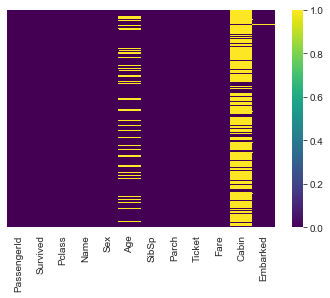

In [44]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
numerical_cols = list(train.select_dtypes(exclude='O').columns)
cat_cols       = list(train.select_dtypes(include='O').columns)

In [10]:
print(numerical_cols)
print(cat_cols)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
train[numerical_cols]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

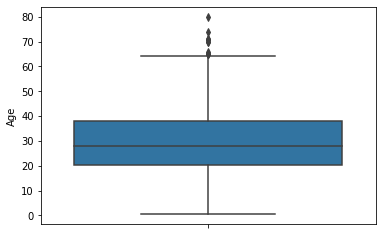

In [13]:
sns.boxplot(y=train['Age'])

In [ ]:
sns.boxplot(y=train['Age'])

In [ ]:
train['Age'].describe()

In [ ]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

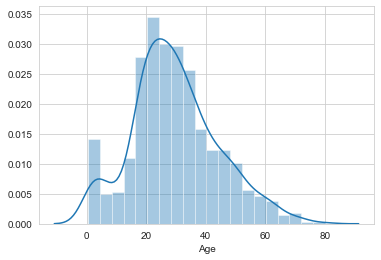

In [14]:
sns.set_style('whitegrid')
sns.distplot(train['Age'].dropna())

In [ ]:
train['Age'].value_counts()

In [ ]:
train['Age'].describe()

In [16]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
test['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [18]:
train['Sex'] = train['Sex'].map({'female':0, 'male':1})

In [19]:
le_embarked = LabelEncoder()

In [22]:
train['Embarked'].isnull().sum()

2

In [23]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
train['Embarked'] = train['Embarked'].fillna('S')

In [25]:
train['Embarked'] = le_embarked.fit_transform(train['Embarked'])

In [21]:
help(le_embarked)

Help on LabelEncoder in module sklearn.preprocessing.label object:

class LabelEncoder(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Encode labels with value between 0 and n_classes-1.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_targets>`.
 |  
 |  Attributes
 |  ----------
 |  classes_ : array of shape (n_class,)
 |      Holds the label for each class.
 |  
 |  Examples
 |  --------
 |  `LabelEncoder` can be used to normalize labels.
 |  
 |  >>> from sklearn import preprocessing
 |  >>> le = preprocessing.LabelEncoder()
 |  >>> le.fit([1, 2, 2, 6])
 |  LabelEncoder()
 |  >>> le.classes_
 |  array([1, 2, 6])
 |  >>> le.transform([1, 1, 2, 6]) #doctest: +ELLIPSIS
 |  array([0, 0, 1, 2]...)
 |  >>> le.inverse_transform([0, 0, 1, 2])
 |  array([1, 1, 2, 6])
 |  
 |  It can also be used to transform non-numerical labels (as long as they are
 |  hashable and comparable) to numerical labels.
 |  
 |  >>> le = preprocessing.LabelEncoder()
 |  >>> le.fit(["paris

In [26]:
train['Cabin'].isnull().sum()

687

In [29]:
train['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
D              3
              ..
C30            1
B82 B84        1
A24            1
B73            1
B37            1
Name: Cabin, Length: 147, dtype: int64

In [32]:
train['Fare'].isnull().sum()

0

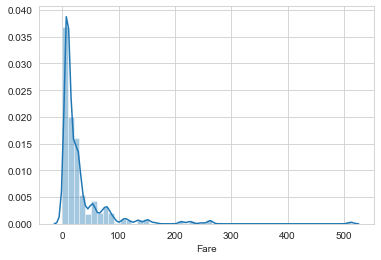

In [33]:
sns.distplot(train['Fare'])

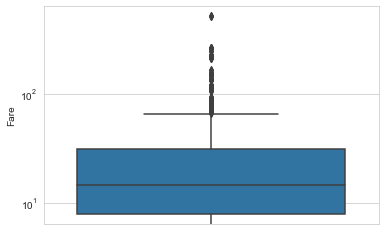

In [36]:
plt.yscale('log')
sns.boxplot(y=train['Fare'])
plt.show()